# XGBoostでパラメータ指定する方法を確認
Scikit-learnAPIの場合

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1.データ作成

In [2]:
df = pd.DataFrame(np.arange(6000), columns=['target'])

In [3]:
df['feature'] = df['target']

In [4]:
print(df.shape)
df.head()

(6000, 2)


,target,feature
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


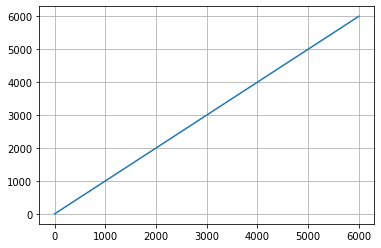

In [5]:
df['target'].plot(grid=True)

## 2.データ分割

In [6]:
X_train = pd.DataFrame(df['feature'][:4000])
y_train = df['target'][:4000]

X_valid = pd.DataFrame(df['feature'][4000:5000])
y_valid = df['target'][4000:5000]

X_test = pd.DataFrame(df['feature'][5000:])
y_test = df['target'][5000:]

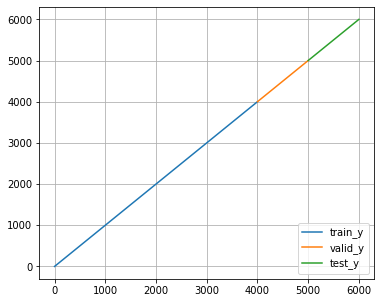

In [7]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_train,label='train_y')
plt.plot(y_valid,label='valid_y')
plt.plot(y_test,label='test_y')
#plt.plot(y_pred_train,label='train_pred')
#plt.plot(y_pred_valid,label='valid_pred')
#plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

## 3.モデリング

## 3-1.XGBoostインストール

In [8]:
!pip install xgboost==1.5.0

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [9]:
import xgboost as xgb

In [10]:
### バージョン確認
xgb.__version__

'1.5.0'

## 3-2.パラメータ指定なし：最もシンプルな方法
https://qiita.com/msrks/items/e3e958c04a5167575c41

In [11]:
#回帰なのでXGBRegressorを利用
xgb_reg = xgb.XGBRegressor()

In [12]:
### パラメータ確認
xgb_reg.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [13]:
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### 学習

In [14]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### 学習できているかどうかは、予測することで確認できる。

In [15]:
y_pred_test  = xgb_reg.predict(X_test)

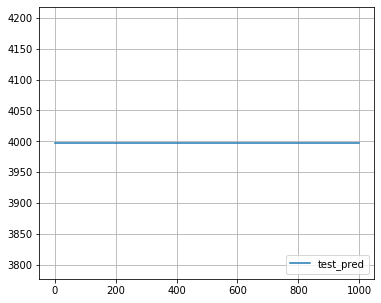

In [16]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

In [17]:
### 重要度
xgb_reg.feature_importances_

array([1.], dtype=float32)

### 学習曲線
https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor.evals_result

In [18]:
### 学習曲線
#xgb_reg.evals_result() ### エラーになる（validationしていないため）

## 3-3.Estimatorのみパラメータ指定

### estimatorで取れるパラメータ
https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

n_estimators  
max_depth  
learning_rate  
verbosity  
objective  
booster  
tree_method  
n_jobs  
gamma  
min_child_weight  
max_delta_step  
subsample  
colsample_bytree  
colsample_bylevel  
colsample_bynode  
reg_alpha  
reg_lambda  
scale_pos_weight  
base_score  
random_state  
missing  
num_parallel_tree  
monotone_constraints  
interaction_constraints  
importance_type  
gpu_id  
validate_parameters  
predictor  
enable_categorical  
eval_metric  
early_stopping_rounds  
callbacks  
kwargs  
  

In [19]:
kwargs = {
 'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 #'missing': '',   ### うまく指定できない
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [20]:
#回帰なのでXGBRegressorを利用
xgb_reg2 = xgb.XGBRegressor(**kwargs)

In [21]:
### パラメータ確認
xgb_reg2.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [22]:
xgb_reg2.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [23]:
xgb_reg2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
y_pred_test  = xgb_reg2.predict(X_test)

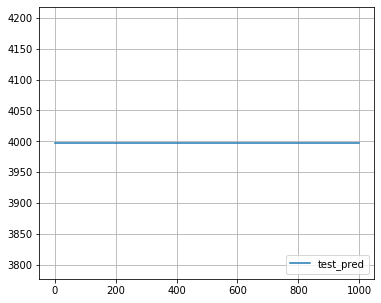

In [25]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

In [26]:
xgb_reg.feature_importances_

array([1.], dtype=float32)

In [27]:
### 学習曲線
#xgb_reg2.evals_result() ### エラーになる（validationしていないため）

## 3-3.fitにパラメータ指定
https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor.fit

### fit関数のパラメータ
https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor.fit

X:特徴量  
y:ターゲット  
は必須のインプット  

sample_weight=None,  
base_margin=None,  
eval_set=None,  
eval_metric=None,  
early_stopping_rounds=None,  
verbose=True,  
xgb_model=None,  
sample_weight_eval_set=None,  
base_margin_eval_set=None,  
feature_weights=None,  
callbacks=None  

In [28]:
fit_params = { # デフォルト値
    'X': X_train,
    'y': y_train,
    'sample_weight': None,
    'base_margin': None,
    'eval_set': [(X_train, y_train),(X_valid, y_valid)], # None # early_stopping_roundsの評価指標算出用データ
    'eval_metric': None, # early_stopping_roundsの評価指標
    'early_stopping_rounds': None, # 学習時、評価指標がこの回数連続で改善しなくなった時点でストップ
    'verbose': 1, # True: eval_set がないと、出力されない 学習中のコマンドライン出力
    'xgb_model': None,
    'sample_weight_eval_set': None,
    'base_margin_eval_set': None,
    'feature_weights': None,
    'callbacks': None
}

In [29]:
#xgb_reg2.fit(X_train, y_train, **fit_params)
xgb_reg2.fit(**fit_params)

[0]	validation_0-rmse:1619.24622	validation_1-rmse:3391.03467
[1]	validation_0-rmse:1135.81824	validation_1-rmse:2587.07642
[2]	validation_0-rmse:796.74597	validation_1-rmse:2012.25317
[3]	validation_0-rmse:558.99304	validation_1-rmse:1601.89343
[4]	validation_0-rmse:392.28442	validation_1-rmse:1306.80383
[5]	validation_0-rmse:275.44562	validation_1-rmse:1098.19165
[6]	validation_0-rmse:193.56270	validation_1-rmse:956.35791
[7]	validation_0-rmse:136.29680	validation_1-rmse:850.32111
[8]	validation_0-rmse:96.33594	validation_1-rmse:774.88580
[9]	validation_0-rmse:68.35844	validation_1-rmse:724.01886
[10]	validation_0-rmse:48.75631	validation_1-rmse:685.25641
[11]	validation_0-rmse:35.13022	validation_1-rmse:657.15137
[12]	validation_0-rmse:25.83508	validation_1-rmse:636.95709
[13]	validation_0-rmse:19.35224	validation_1-rmse:624.29291
[14]	validation_0-rmse:15.03282	validation_1-rmse:614.50043
[15]	validation_0-rmse:12.24762	validation_1-rmse:606.11865
[16]	validation_0-rmse:10.32911	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
y_pred_train = xgb_reg2.predict(X_train)
y_pred_valid = xgb_reg2.predict(X_valid)
y_pred_test  = xgb_reg2.predict(X_test)

y_pred_train = pd.Series(y_pred_train, index=y_train.index)
y_pred_valid = pd.Series(y_pred_valid, index=y_valid.index)
y_pred_test  = pd.Series(y_pred_test,  index=y_test.index)

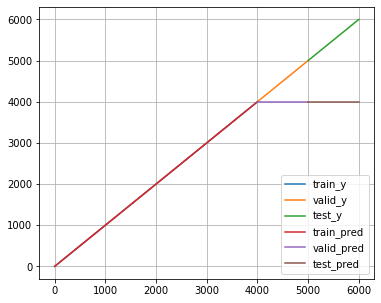

In [31]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_train,label='train_y')
plt.plot(y_valid,label='valid_y')
plt.plot(y_test,label='test_y')
plt.plot(y_pred_train,label='train_pred')
plt.plot(y_pred_valid,label='valid_pred')
plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

## 3-4.fitのよくあるパターン
Xとyはfit()で指定するバターンがwebの記事ではよくある。上記はパラメータ辞書に入れてしまった。

In [32]:
fit_params = { # デフォルト値
    #'X': X_train,
    #'y': y_train,
    'sample_weight': None,
    'base_margin': None,
    'eval_set': [(X_train, y_train),(X_valid, y_valid)], # None # early_stopping_roundsの評価指標算出用データ
    'eval_metric': None, # early_stopping_roundsの評価指標
    'early_stopping_rounds': None, # 学習時、評価指標がこの回数連続で改善しなくなった時点でストップ
    'verbose': 1, # True: eval_set がないと、出力されない 学習中のコマンドライン出力
    'xgb_model': None,
    'sample_weight_eval_set': None,
    'base_margin_eval_set': None,
    'feature_weights': None,
    'callbacks': None
}

In [33]:
#xgb_reg2.fit(X_train, y_train, **fit_params)
xgb_reg2.fit(X_train, y_train, **fit_params)

[0]	validation_0-rmse:1619.24622	validation_1-rmse:3391.03467
[1]	validation_0-rmse:1135.81824	validation_1-rmse:2587.07642
[2]	validation_0-rmse:796.74597	validation_1-rmse:2012.25317
[3]	validation_0-rmse:558.99304	validation_1-rmse:1601.89343
[4]	validation_0-rmse:392.28442	validation_1-rmse:1306.80383
[5]	validation_0-rmse:275.44562	validation_1-rmse:1098.19165
[6]	validation_0-rmse:193.56270	validation_1-rmse:956.35791
[7]	validation_0-rmse:136.29680	validation_1-rmse:850.32111
[8]	validation_0-rmse:96.33594	validation_1-rmse:774.88580
[9]	validation_0-rmse:68.35844	validation_1-rmse:724.01886
[10]	validation_0-rmse:48.75631	validation_1-rmse:685.25641
[11]	validation_0-rmse:35.13022	validation_1-rmse:657.15137
[12]	validation_0-rmse:25.83508	validation_1-rmse:636.95709
[13]	validation_0-rmse:19.35224	validation_1-rmse:624.29291
[14]	validation_0-rmse:15.03282	validation_1-rmse:614.50043
[15]	validation_0-rmse:12.24762	validation_1-rmse:606.11865
[16]	validation_0-rmse:10.32911	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [34]:
y_pred_train = xgb_reg2.predict(X_train)
y_pred_valid = xgb_reg2.predict(X_valid)
y_pred_test  = xgb_reg2.predict(X_test)

y_pred_train = pd.Series(y_pred_train, index=y_train.index)
y_pred_valid = pd.Series(y_pred_valid, index=y_valid.index)
y_pred_test  = pd.Series(y_pred_test,  index=y_test.index)

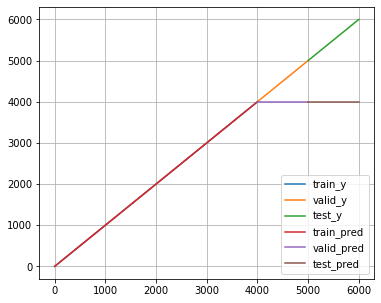

In [35]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_train,label='train_y')
plt.plot(y_valid,label='valid_y')
plt.plot(y_test,label='test_y')
plt.plot(y_pred_train,label='train_pred')
plt.plot(y_pred_valid,label='valid_pred')
plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

# 結論
Estimatorと、fitで指定するパラメータは異なる。
どちらも辞書形式で与えることが可能。